# **Bike Sharing Assignment**
## *Upgrad Assignment*
###  by **Beng Cheong Cheong** 


# Aims of the project
This project aims to help US bike-sharing company, BoomBikes, identify the factors (variables) affect the demand of shared bikes in the US market. The aims of this project is to identify the variables which are significant in predicting the demand for shared bikes, and how well do these variables describe the bike demand for BoomBikes. 

## Table of Contents
* [0. Business Problem](#0-business-problem)
* [1. Data Understanding](#1-data-understanding)
* [2. Data Cleaning](#2-data-cleaning)
* [3. Data Analysis](#3-data-analysis)
    * [3.1 Categorical Variables](#31-categorical-variables)
    * [3.2 Numerical Variables](#32-numerical-variables)
    * [3.3 Final Summary](#33-final-summary)
* [4. Model Building](#4-model-building)
    * [4.1 Feature Engineering](#41-feature-engineering)
    * [4.2 Forward Selection](#42-forward-selection)
    * [4.3 RFE Method](#43-rfe-method)
    * [4.4 Residual Analysis of Training Data](#44-residual-analsis-of-training-data)
* [5. Making Predictions](#5-making-predictions)
* [6. Model Selection](#6-model-selection)

# 0. Business Problem

BoomBikes is bike-sharing company in the US that has seen its revenue drop due to the coronavirus pandemic and thus, is fidning the business very difficult to sustain in the US under such circumstances. As the US is gradually reopening as we move towards an endemic strategy in combatting the virus, BoomBikes wants to better understand the demand for shared bikes so as to better optimize their business strategy. 

# 1. Data Understanding

The first phase of the project consisted of becoming familiar with the data set. First step was in importing the necessary libraries, reading in the data set from the provided file into a data frame, and inspecting it. This phase is all about understanding what our data set looks, whether there are any issues such as too many null valus, and what we kind of insights that we can extract from our dataset with the view of building a strong multiple linear regression model to predict the demand for bike sharing.

In [1]:
#importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import statsmodels.api as sm
import sklearn

import warnings #turning off warnings
warnings.filterwarnings('ignore')

#printing the versions of libraries to be used in this notebook
from platform import python_version
print("python: ",python_version())
print("numpy: ",np.__version__) #numpy version
print("pandas: ",pd.__version__) #pandas version
print("matplotlib: ",matplotlib.__version__) #matplotlib version
print("seaborn: ",sns.__version__)
print("plotly: ",plotly.__version__)
print("statsmodels: ",sm.__version__)
print("sklearn: ",sklearn.__version__)

python:  3.8.8
numpy:  1.19.5
pandas:  1.2.4
matplotlib:  3.3.4
seaborn:  0.11.1
plotly:  5.5.0
statsmodels:  0.12.2
sklearn:  0.24.1


In [2]:
#reading in .csv data file and previewing the data
df = pd.read_csv('day.csv')
df

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
0             2  14.110847  18.18125  80.5833  10.749882     331         654   
1             2  14.902598  17.68695  69.6087  16.652113     131         670   
2             1   8.050924   9.47025  43.7273  16.636703     120        1229   
3             1   8.200000  10.60610  59.0435  10.739832     108        1454   
4             1   9.305237  11.46350  43.6957  12.522300      82        1518   
..          ...        ...       ...      ...        ...     ...         ...   
725           2  10.420847  11.33210  65.2917  23.458911     247        1867   
726           2  10.386653  12.75230  59.0000  10.416557     644        2451   
727           2  10.386653  12.12000  75.2917   8.333661     159        1182   
728           1  10.489153  11.58500  48.3333  23.500518     364        1432   
729           2   8.849153  11.17435  57.7500  10.374682     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
725  2114  
726  3095  
727  1341  
728  1796  
729  2729  

[730 rows x 16 columns]

In [3]:
# checking the dtype of each and every column, and checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
# printing the unique values of each columns to have an understanding of what values are contained in each column
for col in df.columns[1:]:
    print("For col name: {}".format(col))
    print(df[col].unique())
    print("------")

For col name: dteday
['01-01-2018' '02-01-2018' '03-01-2018' '04-01-2018' '05-01-2018'
 '06-01-2018' '07-01-2018' '08-01-2018' '09-01-2018' '10-01-2018'
 '11-01-2018' '12-01-2018' '13-01-2018' '14-01-2018' '15-01-2018'
 '16-01-2018' '17-01-2018' '18-01-2018' '19-01-2018' '20-01-2018'
 '21-01-2018' '22-01-2018' '23-01-2018' '24-01-2018' '25-01-2018'
 '26-01-2018' '27-01-2018' '28-01-2018' '29-01-2018' '30-01-2018'
 '31-01-2018' '01-02-2018' '02-02-2018' '03-02-2018' '04-02-2018'
 '05-02-2018' '06-02-2018' '07-02-2018' '08-02-2018' '09-02-2018'
 '10-02-2018' '11-02-2018' '12-02-2018' '13-02-2018' '14-02-2018'
 '15-02-2018' '16-02-2018' '17-02-2018' '18-02-2018' '19-02-2018'
 '20-02-2018' '21-02-2018' '22-02-2018' '23-02-2018' '24-02-2018'
 '25-02-2018' '26-02-2018' '27-02-2018' '28-02-2018' '01-03-2018'
 '02-03-2018' '03-03-2018' '04-03-2018' '05-03-2018' '06-03-2018'
 '07-03-2018' '08-03-2018' '09-03-2018' '10-03-2018' '11-03-2018'
 '12-03-2018' '13-03-2018' '14-03-2018' '15-03-2018' '1

In [5]:
# checking for null value in dataset
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


# 2. Data Cleaning

Here, a few issues were observed from the above data exploration and understanding process and some steps will be taken next to address these issues.
1. 'dteday' is in object type, and it will be better to convert to datetime type to visualize time-series graph
2. no null or missing values
3. 'cnt' is in numeric type and will be the target of our model
4. 'weathersit' only has 3 categories (1,2,3). Category 4 ('heavy rain + ice pallets etc.) missing. 

In [6]:
# realizing the dteday is in object type, step is to convert into datetime64[ns] type
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')

# recommended that it is good to look at the week number of the month, as the week in which 
# people receive salary can affect demand in good and services
# for e.g., demand will raise in that week when people receive their salary
def datetime_to_week_num (datetime):
    datetime = datetime.day
    if datetime <= 10:
        return 1
    elif datetime > 10 and datetime <=20:
        return 2
    else:
        return 3
    
df['wk_num'] = df['dteday'].apply(datetime_to_week_num)
df

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1 2018-01-01       1   0     1        0        6           0   
1          2 2018-01-02       1   0     1        0        0           0   
2          3 2018-01-03       1   0     1        0        1           1   
3          4 2018-01-04       1   0     1        0        2           1   
4          5 2018-01-05       1   0     1        0        3           1   
..       ...        ...     ...  ..   ...      ...      ...         ...   
725      726 2019-12-27       1   1    12        0        4           1   
726      727 2019-12-28       1   1    12        0        5           1   
727      728 2019-12-29       1   1    12        0        6           0   
728      729 2019-12-30       1   1    12        0        0           0   
729      730 2019-12-31       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
0             2  14.110847  18.18125  80.5833  10.749882     331         654   
1             2  14.902598  17.68695  69.6087  16.652113     131         670   
2             1   8.050924   9.47025  43.7273  16.636703     120        1229   
3             1   8.200000  10.60610  59.0435  10.739832     108        1454   
4             1   9.305237  11.46350  43.6957  12.522300      82        1518   
..          ...        ...       ...      ...        ...     ...         ...   
725           2  10.420847  11.33210  65.2917  23.458911     247        1867   
726           2  10.386653  12.75230  59.0000  10.416557     644        2451   
727           2  10.386653  12.12000  75.2917   8.333661     159        1182   
728           1  10.489153  11.58500  48.3333  23.500518     364        1432   
729           2   8.849153  11.17435  57.7500  10.374682     439        2290   

      cnt  wk_num  
0     985       1  
1     801       1  
2    1349       1  
3    1562       1  
4    1600       1  
..    ...     ...  
725  2114       3  
726  3095       3  
727  1341       3  
728  1796       3  
729  2729       3  

[730 rows x 17 columns]

# 3. Data Analysis

## 3.1 Categorical Variables
Here, I will be visualizing and exploring the data.
First step it is to visualize the categorical variables

In [7]:
import plotly.express as px

#plotting time series graph to look at Bike Rental over time
fig = px.line(df, x='dteday', y="cnt", labels=dict(dteday="Date", cnt="Rental Count"),
             title="Rental Count over 2018 and 2019")
fig.show()

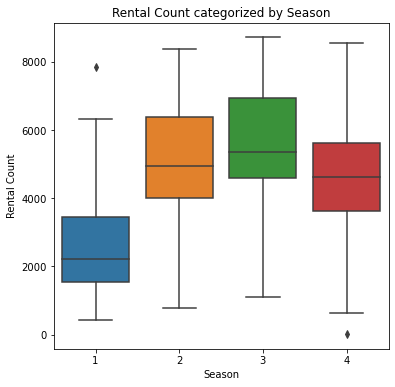

In [13]:
# plotting bike rental count categorized by season (1:spring, 2:summer, 3:fall, 4:winter)
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="season", y="cnt", data=df)
plt.xlabel("Season")
plt.ylabel("Rental Count")
plt.title("Rental Count categorized by Season")
plt.show()

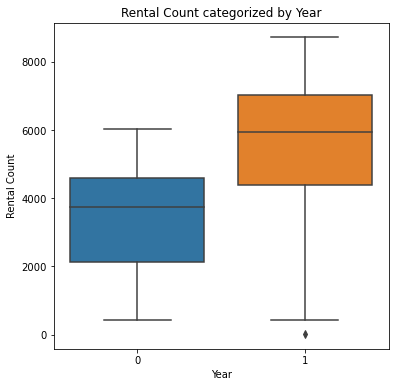

In [9]:
# plotting bike rental count categorized by year (0: 2018, 1:2019)
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="yr", y="cnt", data=df)
plt.xlabel("Year")
plt.ylabel("Rental Count")
plt.title("Rental Count categorized by Year")
plt.show()

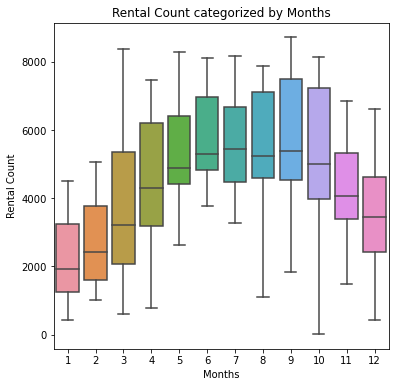

In [10]:
# plotting bike rental count categorized by months
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="mnth", y="cnt", data=df)
plt.xlabel("Months")
plt.ylabel("Rental Count")
plt.title("Rental Count categorized by Months")
plt.show()

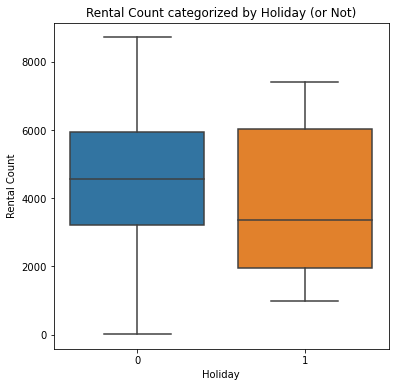

In [11]:
# plotting bike rental count categorized by whether the day is holiday or not (0: Not Holiday, 1: Is Holiday)
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="holiday", y="cnt", data=df)
plt.xlabel("Holiday")
plt.ylabel("Rental Count")
plt.title("Rental Count categorized by Holiday (or Not)")
plt.show()

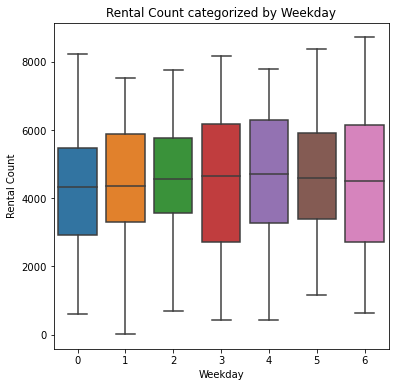

In [12]:
# plotting bike rental count categorized by weekday
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="weekday", y="cnt", data=df)
plt.xlabel("Weekday")
plt.ylabel("Rental Count")
plt.title("Rental Count categorized by Weekday")
plt.show()

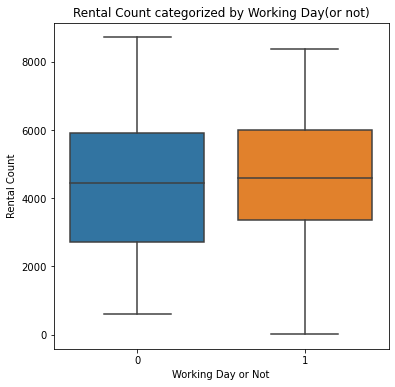

In [13]:
# plotting bike rental count categorized by working day or not (0: Not Working Day, 1: Working Day)
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="workingday", y="cnt", data=df)
plt.xlabel("Working Day or Not")
plt.ylabel("Rental Count")
plt.title("Rental Count categorized by Working Day(or not)")
plt.show()

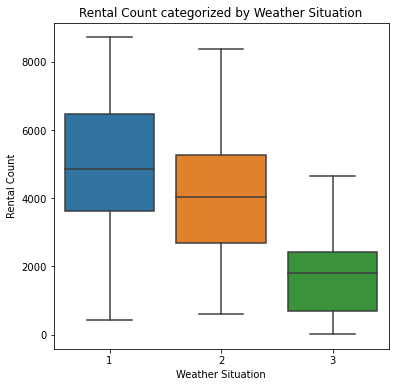

In [14]:
# plotting bike rental count categorized by weather situation (1: Clear, 2: Mist, 3: Snow)
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="weathersit", y="cnt", data=df)
plt.xlabel("Weather Situation")
plt.ylabel("Rental Count")
plt.title("Rental Count categorized by Weather Situation")
plt.show()

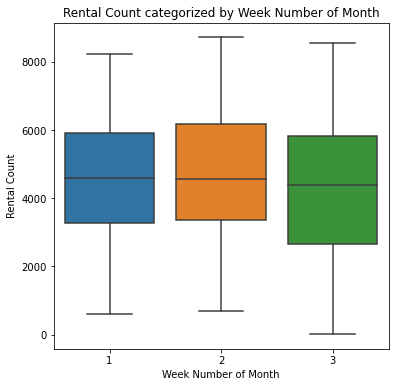

In [15]:
# plotting bike rental count categorized by week number of month
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="wk_num", y="cnt", data=df)
plt.xlabel("Week Number of Month")
plt.ylabel("Rental Count")
plt.title("Rental Count categorized by Week Number of Month")
plt.show()

### Summary

In summary, the following conclusions were drawn from the boxplots.
1. Seasonality will have an impact on the target variable. The rental count in spring is much lower than the other seasons. It is likely that this is due to the weather being too cold in Spring dissaudes people from cycling. However, results from boxplot show the statistics for the other seasons as the same; therefore, I will be creating a new feature called "is_not_spring".
2. Whether a day is a holiday or not will likely have an impact on the target variable. Bike rental will be higher on non-holidays as people need transport to move around for work purposes. "Holiday" will be used for the model. 
3. Weather situation will also have an impact on the target variable. Bike rental will be lower on days when the weather is snowing, as compared when the weather is clear, is snowing or is experiencing heavy rain. However, multicollinearity may arise from the one-hot-encodedding of features. I will be retaining only the feature column when weather is clear. This will be explained in the next section.
4. Time-series graph suggests that bike rental count went up in 2019 as compared to compared to 2018. Boxplot of year also agrees on this finding. Therefore, Year will have an impact on the target variable

## 3.2 Numerical variables
Here, I will be visualizing and exploring the data by visualizing the numerical variables with pairplot.

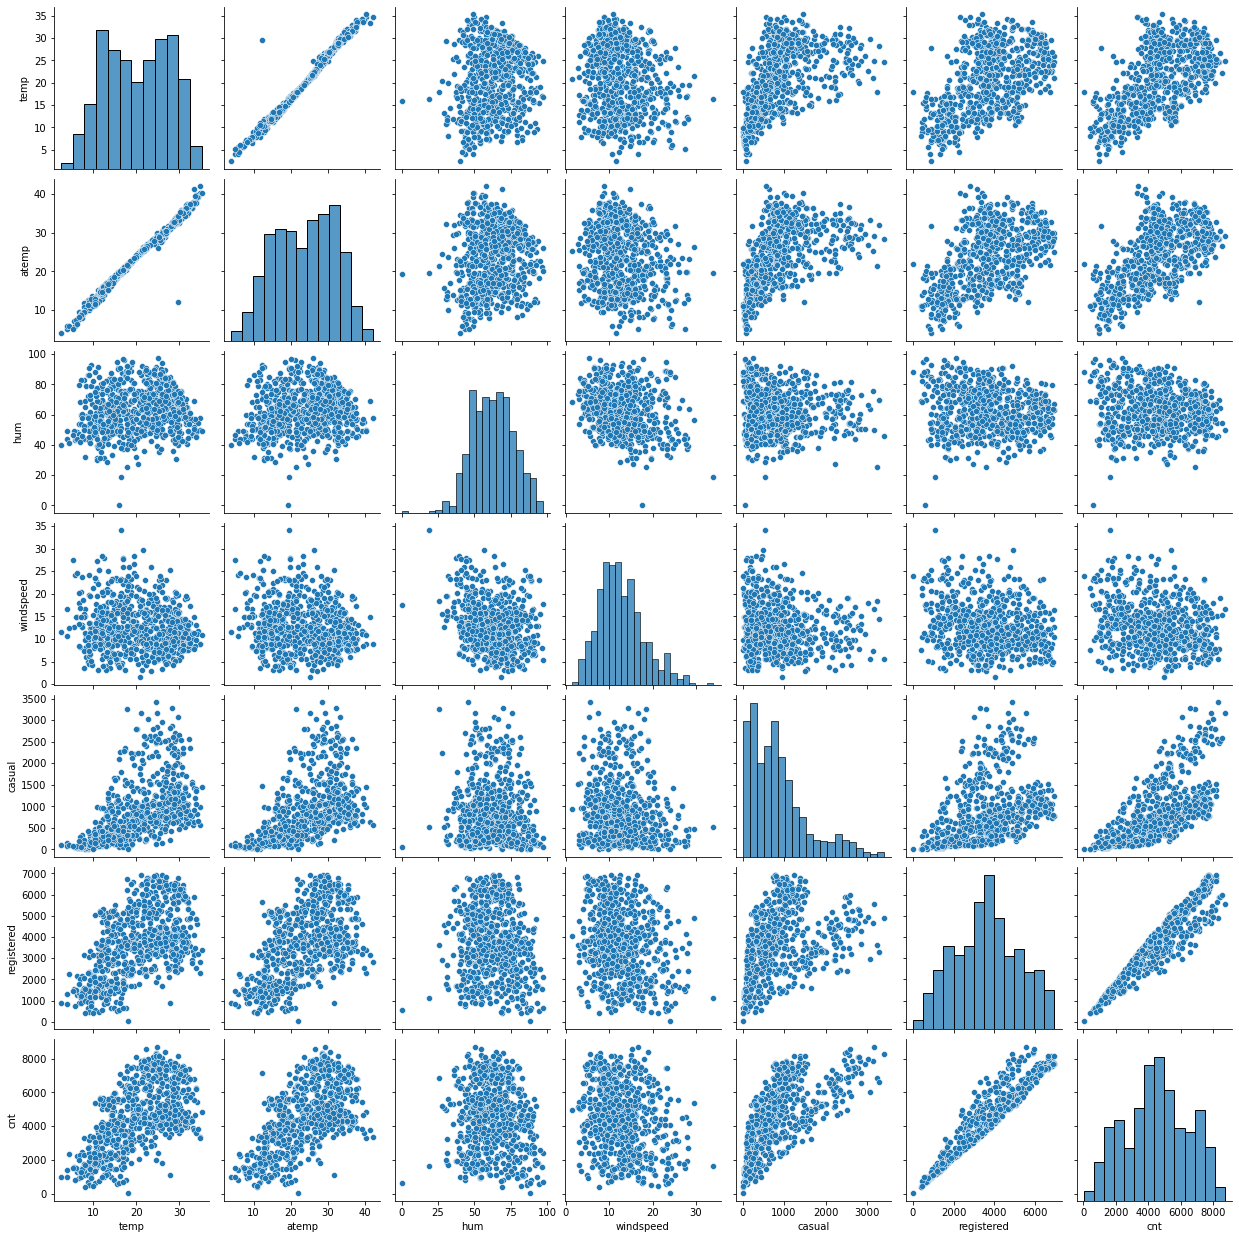

In [16]:
df_pairplot = df.loc[:, 'temp':'cnt']
sns.pairplot(df_pairplot) #plot pairplot

However, I understand that "casual" and "registered" feature columns are directly derived from "cnt"; therefore, this can cause data leak issues. These two feature columns will be removed from further analysis. 

In [17]:
# calculating VIF in order to remove feature columns that are correlated to each other. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_vif = df_pairplot.iloc[:,:-3] #removing target variable 'cnt', 'casual', and 'registered' from the VIF calculation

vif_data = pd.DataFrame()
vif_data["name"] = df_vif.columns

vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(len(df_vif.columns))]

vif_data

name         VIF
0       temp  488.306256
1      atemp  542.888840
2        hum   11.071034
3  windspeed    4.678072

In [18]:
df_vif.drop(['temp'], axis = 1, inplace = True)#removing target variable 'cnt' from the VIF calculation

vif_data = pd.DataFrame()
vif_data["name"] = df_vif.columns

vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(len(df_vif.columns))]

vif_data

name       VIF
0      atemp  7.930277
1        hum  9.741540
2  windspeed  4.677661

Although VIF values from 5 to 10 can be moderately high, I will be retaining these three numeric features for building my model, because these three features are all related to weather, there should be some kind of correlation between these three features, and VIF values from 5 to 10 are not high enough to be removed. 

### Summary
1. From the results of the VIF table, I will be removing one of the feature columns "temp" and "atemp". I believe that people will be more attuned to "atemp", which is the temperature that people feel, because as people feel it is too cold or too warm, people will not be renting bikes.
2. "causal" and "registered" feature columns will be removed as they were derived from the "cnt" target column, and including these two columns will cause a data leak.
3. Some pattern of inverse relationship between "hum" and "cnt", and "windspeed" and "cnt". As weather becomes more humid, bike rental count begins to fall. Similarly, as windspeed becomes high, bike rental count begins to fall. 


## 3.3 Final Summary

The feature columns that I am considering to use from my analysis of categorical and numeric variables are:
1. Feeling temperature ("atemp")
2. humidity ("hum")
3. windspeed
4. season
5. holiday
6. year
7. weather situation ("weathersit")

# 4. Model Building
## 4.1 Feature Engineering

The next step I would do is feature engineering.
From the boxplot observed when I was plotting bike rental count categorized by season, I realized the statistics (mean, 75th percentile, 25th percentile) of spring is much lower than the other seasons, while the differences across the other seasons are not that different.
I hypothesized that because it is usually much colder in Spring in the USA, people will avoid renting bikes; therefore, the rental count for spring will be lower.
Therefore, I will be doing feature engineering and creating a new column in which spring is coded as 0, and other seasons is coded as 1.


In addition, feature engineering will be performed after considering the boxplots of "weathersit" feature, I will be one-hot-encoding this feature.  
Multicollinearity may arise from the one-hot-encodedding of features. 
I will be retaining only the feature column when weather is snow, as I observed from the boxplot the statistics for weather is experiencing snow (labelled '3') is lower than the other seasons.

In [19]:
df.groupby('mnth').agg({'season':'first'}) #just to visualize the relationship betweens season and mth columns

season
mnth        
1          1
2          1
3          1
4          2
5          2
6          2
7          3
8          3
9          3
10         4
11         4
12         4

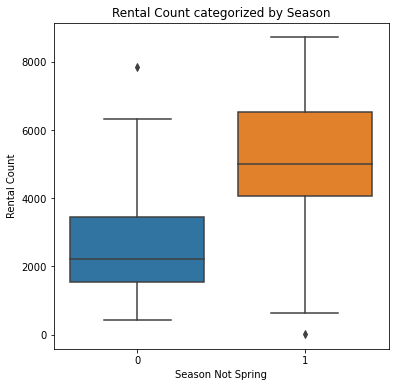

In [20]:
def season_encode(num):
    if num == 1:
        return 0 #code 0 if season is spring
    else:
        return 1 #code 1 if season is not spring
    
df['is_not_spring'] = df['season'].apply(season_encode)
df.drop(['season'], axis = 1, inplace = True)

# plotting bike rental count categorized by whether it is spring or not
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="is_not_spring", y="cnt", data=df)
plt.xlabel("Season Not Spring")
plt.ylabel("Rental Count")
plt.title("Rental Count categorized by Season")
plt.show()

In [21]:
#performing one-hot-encoding on "weathersit" column
weather_sit = pd.get_dummies(df['weathersit']).rename(columns={1:'weather_clear',2:'weather_mist',3:'weather_snow'})
df = pd.concat([df, weather_sit], axis = 1)
df.drop('weathersit', axis = 1, inplace=True) #will drop 'weather_clear' and 'weather_mist' later
df

instant     dteday  yr  mnth  holiday  weekday  workingday       temp  \
0          1 2018-01-01   0     1        0        6           0  14.110847   
1          2 2018-01-02   0     1        0        0           0  14.902598   
2          3 2018-01-03   0     1        0        1           1   8.050924   
3          4 2018-01-04   0     1        0        2           1   8.200000   
4          5 2018-01-05   0     1        0        3           1   9.305237   
..       ...        ...  ..   ...      ...      ...         ...        ...   
725      726 2019-12-27   1    12        0        4           1  10.420847   
726      727 2019-12-28   1    12        0        5           1  10.386653   
727      728 2019-12-29   1    12        0        6           0  10.386653   
728      729 2019-12-30   1    12        0        0           0  10.489153   
729      730 2019-12-31   1    12        0        1           1   8.849153   

        atemp      hum  windspeed  casual  registered   cnt  wk_num  \
0    18.18125  80.5833  10.749882     331         654   985       1   
1    17.68695  69.6087  16.652113     131         670   801       1   
2     9.47025  43.7273  16.636703     120        1229  1349       1   
3    10.60610  59.0435  10.739832     108        1454  1562       1   
4    11.46350  43.6957  12.522300      82        1518  1600       1   
..        ...      ...        ...     ...         ...   ...     ...   
725  11.33210  65.2917  23.458911     247        1867  2114       3   
726  12.75230  59.0000  10.416557     644        2451  3095       3   
727  12.12000  75.2917   8.333661     159        1182  1341       3   
728  11.58500  48.3333  23.500518     364        1432  1796       3   
729  11.17435  57.7500  10.374682     439        2290  2729       3   

     is_not_spring  weather_clear  weather_mist  weather_snow  
0                0              0             1             0  
1                0              0             1             0  
2                0              1             0             0  
3                0              1             0             0  
4                0              1             0             0  
..             ...            ...           ...           ...  
725              0              0             1             0  
726              0              0             1             0  
727              0              0             1             0  
728              0              1             0             0  
729              0              0             1             0  

[730 rows x 19 columns]

In [22]:
#performing one-hot-encoding on "wk_num" column
wk_num = pd.get_dummies(df['wk_num']).rename(columns={1:'first_10',2:'second_10',3:'last_10'})
df = pd.concat([df, wk_num], axis = 1)
df.drop('wk_num', axis = 1, inplace=True) 
df

instant     dteday  yr  mnth  holiday  weekday  workingday       temp  \
0          1 2018-01-01   0     1        0        6           0  14.110847   
1          2 2018-01-02   0     1        0        0           0  14.902598   
2          3 2018-01-03   0     1        0        1           1   8.050924   
3          4 2018-01-04   0     1        0        2           1   8.200000   
4          5 2018-01-05   0     1        0        3           1   9.305237   
..       ...        ...  ..   ...      ...      ...         ...        ...   
725      726 2019-12-27   1    12        0        4           1  10.420847   
726      727 2019-12-28   1    12        0        5           1  10.386653   
727      728 2019-12-29   1    12        0        6           0  10.386653   
728      729 2019-12-30   1    12        0        0           0  10.489153   
729      730 2019-12-31   1    12        0        1           1   8.849153   

        atemp      hum  ...  casual  registered   cnt  is_not_spring  \
0    18.18125  80.5833  ...     331         654   985              0   
1    17.68695  69.6087  ...     131         670   801              0   
2     9.47025  43.7273  ...     120        1229  1349              0   
3    10.60610  59.0435  ...     108        1454  1562              0   
4    11.46350  43.6957  ...      82        1518  1600              0   
..        ...      ...  ...     ...         ...   ...            ...   
725  11.33210  65.2917  ...     247        1867  2114              0   
726  12.75230  59.0000  ...     644        2451  3095              0   
727  12.12000  75.2917  ...     159        1182  1341              0   
728  11.58500  48.3333  ...     364        1432  1796              0   
729  11.17435  57.7500  ...     439        2290  2729              0   

     weather_clear  weather_mist  weather_snow  first_10  second_10  last_10  
0                0             1             0         1          0        0  
1                0             1             0         1          0        0  
2                1             0             0         1          0        0  
3                1             0             0         1          0        0  
4                1             0             0         1          0        0  
..             ...           ...           ...       ...        ...      ...  
725              0             1             0         0          0        1  
726              0             1             0         0          0        1  
727              0             1             0         0          0        1  
728              1             0             0         0          0        1  
729              0             1             0         0          0        1  

[730 rows x 21 columns]

The step forward selection is about startig off with one feature, and then continuing adding more and more features until we arrive at the best performing model.

In [23]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

scaler = StandardScaler() #use standardized scaling

numeric_vars = ['atemp','hum','windspeed'] #numeric variables that I will use
df[numeric_vars] = scaler.fit_transform(df[numeric_vars]) # performing standardized scaling
df

instant     dteday  yr  mnth  holiday  weekday  workingday       temp  \
0          1 2018-01-01   0     1        0        6           0  14.110847   
1          2 2018-01-02   0     1        0        0           0  14.902598   
2          3 2018-01-03   0     1        0        1           1   8.050924   
3          4 2018-01-04   0     1        0        2           1   8.200000   
4          5 2018-01-05   0     1        0        3           1   9.305237   
..       ...        ...  ..   ...      ...      ...         ...        ...   
725      726 2019-12-27   1    12        0        4           1  10.420847   
726      727 2019-12-28   1    12        0        5           1  10.386653   
727      728 2019-12-29   1    12        0        6           0  10.386653   
728      729 2019-12-30   1    12        0        0           0  10.489153   
729      730 2019-12-31   1    12        0        1           1   8.849153   

        atemp       hum  ...  casual  registered   cnt  is_not_spring  \
0   -0.680818  1.252343  ...     331         654   985              0   
1   -0.741507  0.480996  ...     131         670   801              0   
2   -1.750344 -1.338073  ...     120        1229  1349              0   
3   -1.610886 -0.261577  ...     108        1454  1562              0   
4   -1.505615 -1.340294  ...      82        1518  1600              0   
..        ...       ...  ...     ...         ...   ...            ...   
725 -1.521749  0.177576  ...     247        1867  2114              0   
726 -1.347378 -0.264634  ...     644        2451  3095              0   
727 -1.425011  0.880424  ...     159        1182  1341              0   
728 -1.490698 -1.014341  ...     364        1432  1796              0   
729 -1.541117 -0.352490  ...     439        2290  2729              0   

     weather_clear  weather_mist  weather_snow  first_10  second_10  last_10  
0                0             1             0         1          0        0  
1                0             1             0         1          0        0  
2                1             0             0         1          0        0  
3                1             0             0         1          0        0  
4                1             0             0         1          0        0  
..             ...           ...           ...       ...        ...      ...  
725              0             1             0         0          0        1  
726              0             1             0         0          0        1  
727              0             1             0         0          0        1  
728              1             0             0         0          0        1  
729              0             1             0         0          0        1  

[730 rows x 21 columns]

## 4.2 Step Forward Selection
Moving ahead, I will be utilizing Step Forward Selection in building the Multiple Linear Regression Model.
A Step Forward Selection starts with adding a feature into the model and evaluating it, and before adding another feature. This step will be repeated until the best performing model is achieved 

In [24]:
#performing train test split into 75-25 split
from sklearn.model_selection import train_test_split

df_train = df.drop(['instant','dteday','temp','cnt','casual','registered'], axis = 1)
target = df.loc[:,'cnt']
X_train, X_test, y_train, y_test = train_test_split(df_train, target, train_size = 0.75, test_size = 0.25, random_state = 42)

In [25]:
# adding first "atemp", which I feel is the strongest feature column. Model 0
X_train_lm = X_train['atemp']
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     372.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           1.41e-63
Time:                        22:41:26   Log-Likelihood:                -4774.8
No. Observations:                 547   AIC:                             9554.
Df Residuals:                     545   BIC:                             9562.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4506.1526     64.095     70.305      0.0

In [26]:
# adding windspeed. Model 1
selected_features = ['atemp'] + ['windspeed']

X_train_lm1 = X_train[selected_features]
X_train_lm1 = sm.add_constant(X_train_lm1)

lr1 = sm.OLS(y_train, X_train_lm1).fit()

print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     194.9
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           1.49e-64
Time:                        22:41:26   Log-Likelihood:                -4769.3
No. Observations:                 547   AIC:                             9545.
Df Residuals:                     544   BIC:                             9558.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4497.9974     63.563     70.764      0.0

In [27]:
# adding humidity. Model 2
selected_features += ['hum']

X_train_lm2 = X_train[selected_features]
X_train_lm2 = sm.add_constant(X_train_lm2)

lr2 = sm.OLS(y_train, X_train_lm2).fit()

print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     153.3
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           5.85e-72
Time:                        22:41:26   Log-Likelihood:                -4749.3
No. Observations:                 547   AIC:                             9507.
Df Residuals:                     543   BIC:                             9524.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4514.3268     61.389     73.536      0.0

In [28]:
# adding year. Model 3
selected_features += ['yr']

X_train_lm3 = X_train[selected_features]
X_train_lm3 = sm.add_constant(X_train_lm3)

lr3 = sm.OLS(y_train, X_train_lm3).fit()

print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     349.9
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.33e-148
Time:                        22:41:26   Log-Likelihood:                -4568.1
No. Observations:                 547   AIC:                             9146.
Df Residuals:                     542   BIC:                             9168.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3477.5924     63.696     54.597      0.0

In [29]:
#adding holiday. Model 4
selected_features += ['holiday']

X_train_lm4 = X_train[selected_features]
X_train_lm4 = sm.add_constant(X_train_lm4)

lr4 = sm.OLS(y_train, X_train_lm4).fit()

print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     283.5
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.49e-148
Time:                        22:41:26   Log-Likelihood:                -4565.2
No. Observations:                 547   AIC:                             9142.
Df Residuals:                     541   BIC:                             9168.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3496.9892     63.927     54.703      0.0

In [30]:
#adding featured engineered "is_not_spring". Model 5
selected_features += ['is_not_spring']

X_train_lm5 = X_train[selected_features]
X_train_lm5 = sm.add_constant(X_train_lm5)

lr5 = sm.OLS(y_train, X_train_lm5).fit()

print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     335.1
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.00e-178
Time:                        22:41:26   Log-Likelihood:                -4492.5
No. Observations:                 547   AIC:                             8999.
Df Residuals:                     540   BIC:                             9029.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2325.5460    107.125     21.709

In [31]:
#adding weather_snow. Model 6
selected_features += ['weather_snow'] #not including 'weather_clear'and 'weather_mist'

X_train_lm6 = X_train[selected_features]
X_train_lm6 = sm.add_constant(X_train_lm6)

lr6 = sm.OLS(y_train, X_train_lm6).fit()

print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     312.8
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          3.15e-185
Time:                        22:41:26   Log-Likelihood:                -4473.5
No. Observations:                 547   AIC:                             8963.
Df Residuals:                     539   BIC:                             8997.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2353.6510    103.675     22.702

In [32]:
#adding working day. Model 7
selected_features += ['workingday']
selected_features_model_7 = selected_features.copy() 

X_train_lm7 = X_train[selected_features]
X_train_lm7 = sm.add_constant(X_train_lm7)

lr7 = sm.OLS(y_train, X_train_lm7).fit()

print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     275.8
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          7.29e-185
Time:                        22:41:26   Log-Likelihood:                -4471.4
No. Observations:                 547   AIC:                             8961.
Df Residuals:                     538   BIC:                             9000.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2235.2072    118.534     18.857

In [33]:
#removing working day and week_number. Model 8
selected_features.remove('workingday')
selected_features += ['first_10','second_10','last_10']
selected_features_model_8 = selected_features.copy() 

X_train_lm8 = X_train[selected_features]
X_train_lm8 = sm.add_constant(X_train_lm8)

lr8 = sm.OLS(y_train, X_train_lm8).fit()

print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     248.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          7.47e-185
Time:                        22:41:26   Log-Likelihood:                -4468.5
No. Observations:                 547   AIC:                             8957.
Df Residuals:                     537   BIC:                             9000.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1766.9297     77.213     22.884

From observing 

## 4.3 RFE Method

Next, RFE method will be used to compare the selected features with the ones obtained from the Forward Selection Method.
I will be comparing it with model 7, which has the highest F-statistics value and has a high R2 value of 0.801/

In [34]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [35]:
selected_features += ['workingday'] #adding work day back in it
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [36]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 5),
 ('holiday', True, 1),
 ('weekday', False, 4),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', False, 3),
 ('windspeed', True, 1),
 ('is_not_spring', True, 1),
 ('weather_clear', True, 1),
 ('weather_mist', True, 1),
 ('weather_snow', True, 1),
 ('first_10', False, 6),
 ('second_10', False, 2),
 ('last_10', True, 1)]

In [37]:
#selecting columns based on recommendations by RFE algorithm
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['yr', 'holiday', 'workingday', 'atemp', 'windspeed', 'is_not_spring',
       'weather_clear', 'weather_mist', 'weather_snow', 'last_10'],
      dtype='object')


In [38]:
X_train_lm_rfe = X_train[rfe_cols]
X_train_lm_rfe = sm.add_constant(X_train_lm_rfe)

lr_rfe = sm.OLS(y_train, X_train_lm_rfe).fit()

print(lr_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     260.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.16e-189
Time:                        22:41:27   Log-Likelihood:                -4457.9
No. Observations:                 547   AIC:                             8936.
Df Residuals:                     537   BIC:                             8979.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1197.3483    103.902     11.524

## 4.3 Residual Analysis of training data

I have selected two models, one done by the RFE algorithm and Model 8 done by step forward selection, for residual analysis of the training data.

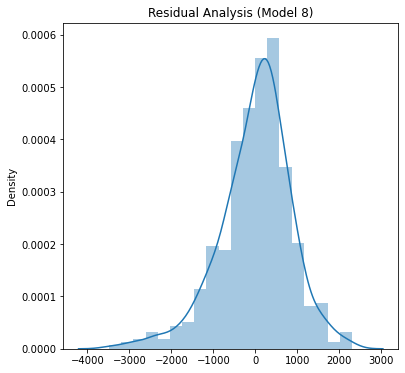

In [39]:
y_train_pred = lr8.predict(X_train_lm8)

fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.distplot((y_train - y_train_pred), bins = 20)
plt.title("Residual Analysis (Model 8)")
plt.show()

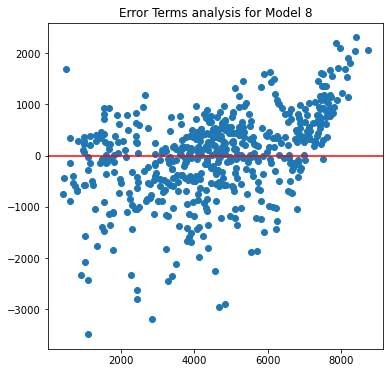

In [40]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(y_train,y_train - y_train_pred)
plt.axhline(0, color='red')
plt.title("Error Terms analysis for Model 8")
plt.show()

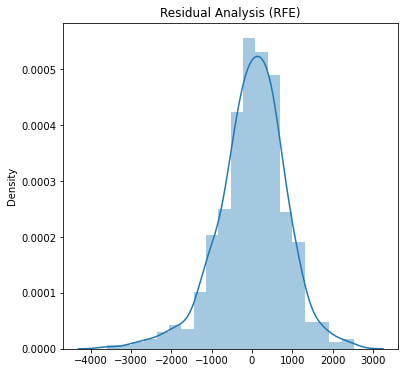

In [41]:
y_train_pred = lr_rfe.predict(X_train_lm_rfe)

fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.distplot((y_train - y_train_pred), bins = 20)
plt.title("Residual Analysis (RFE)")
plt.show()

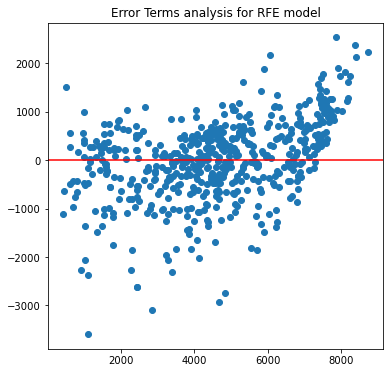

In [42]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(y_train,y_train - y_train_pred)
plt.axhline(0, color='red')
plt.title("Error Terms analysis for RFE model")
plt.show()

In [43]:
rfe_cols2 = ['yr', 'holiday', 'workingday', 'atemp', 'windspeed', 'is_not_spring',
       'weather_clear', 'weather_snow', 'last_10']

X_train_lm_rfe2 = X_train[rfe_cols2]
X_train_lm_rfe2 = sm.add_constant(X_train_lm_rfe2)

lr_rfe2 = sm.OLS(y_train, X_train_lm_rfe2).fit()

print(lr_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     260.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.16e-189
Time:                        22:41:28   Log-Likelihood:                -4457.9
No. Observations:                 547   AIC:                             8936.
Df Residuals:                     537   BIC:                             8979.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1871.8503    132.188     14.160

I will be selecting the model (lr_rfe2) based on the following considerations:
1. In terms of the F-statistics value, lr_rfe2 has a high F-statistics value with significance value and this is a good number as compared to lr_rfe model and model 8.
2. lr_rfe2 has AIC value that is similar to the other models. It did not increase drastically.
3. lr_rfe2 has a good adjusted R2 value and is quite close to the other models at 0.81. Adjusted R2 value is commonly used as a goodness-of-fit measure of a multiple linear regression mode. 
4. Little or low multicollinearity among the features, as the warning of "This might indicate that there are strong multicollinearity problems or that the design matrix is singular" is not shown.

However, both the model done by the lr_rfe model and model 8 are very close and comparable, as both have error terms that are distributed normally, and scattered around 0, which implies homoscedasticity. All three models are very close and are very comparable to each other.

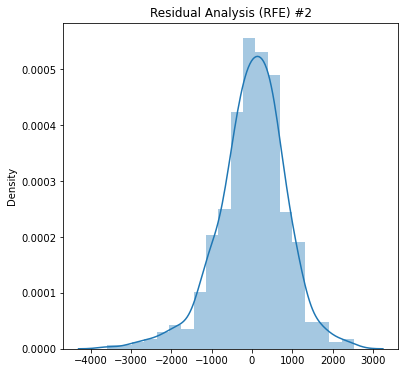

In [44]:
y_train_pred = lr_rfe2.predict(X_train_lm_rfe2)

fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.distplot((y_train - y_train_pred), bins = 20)
plt.title("Residual Analysis (RFE) #2")
plt.show()

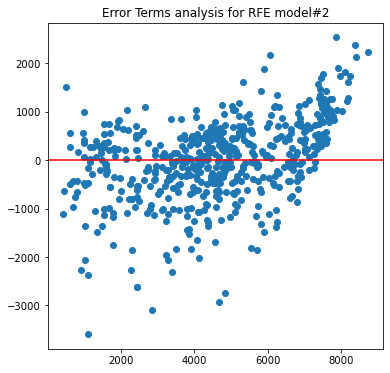

In [45]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(y_train,y_train - y_train_pred)
plt.axhline(0, color='red')
plt.title("Error Terms analysis for RFE model#2")
plt.show()

# 5 Making predictions

In [46]:
# Note that this model will be my final model
X_test_rfe2 = X_test[rfe_cols2]
X_test_rfe2 = sm.add_constant(X_test_rfe2)

y_pred = lr_rfe2.predict(X_test_rfe2)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8123625210350737

In [47]:
# this model is to show an alternative model using step forward selection method. Please note that this is not my final model.
X_test_lr8 = X_test[selected_features_model_8]
X_test_lr8 = sm.add_constant(X_test_lr8)

y_pred = lr8.predict(X_test_lr8)

r2_score(y_test, y_pred)

0.8149349700666019

Furthermore, as shown above, both rfe and my step foward model 8 are equally strong in the R2 score at about 0.81, and both models are comparable with each other.

# 6 Model Selection

### lr_rfe2 will be the model selected by me for this assignment.
The three features that contribute strongly to the model are.
1. Year. This means that year is a important feature because more bikes are rented out during the second year (2019) when the company became more established and well-known in USA.
2. Not Spring. When the season is not spring, more bikes are rented out as Spring is a season when temperatures are lower and snow and dangerous weather conditions are more frequent.
3. Weather is snowing. When the weather is snowing, far fewer bikes are rented out as it is not safe to ride, and there is a strong inverse relationshp, as indicated by high negative beta coefficient value. 

### Possible recommendation
1. Bike rental was higher in second year than first. It could be due to the company had more exposure and brand awareness from longer market presence in 2019 (second year). So it is important to continue marketing and maintain market awareness.
2. Spring is usually a dangerous time to cycle, as snowstorms are frequent in January and February. Company could keep the bikes in warehouse since rental count will be low and company can protect the bikes from extreme weather.
3. Same reason as above, as people are unlikely to cycle due to snow. Bikeboom can keep the bikes in warehouses during Spring (as it is more likely to snow). 